In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

os.chdir('/content/drive/My Drive/open_ai/anime-classification')

data_dir = 'data'
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

raw_data_dir = 'raw'  
  
test_pct = 0.2
valid_pct = 0.2

train_dir = os.path.join(data_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)

valid_dir = os.path.join(data_dir, 'valid')
if not os.path.exists(valid_dir):
  os.mkdir(valid_dir)

test_dir = os.path.join(data_dir, 'test')
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

for label in os.listdir(raw_data_dir):
  train_label_dir = os.path.join(train_dir, label)
  if not os.path.exists(train_label_dir):
    os.mkdir(train_label_dir)
  valid_label_dir = os.path.join(valid_dir, label)
  if not os.path.exists(valid_label_dir):
    os.mkdir(valid_label_dir)
  test_label_dir = os.path.join(test_dir, label)
  if not os.path.exists(test_label_dir):
    os.mkdir(test_label_dir)

In [0]:
import random
import shutil

for label in os.listdir(raw_data_dir):
  label_dir = os.path.join(raw_data_dir, label)
  fnames = os.listdir(label_dir)
  random.shuffle(fnames)
  
  num_files = len(fnames)
  num_test_files = int(test_pct * num_files)
  num_valid_files = int(valid_pct * num_files)
  num_train_files = num_files - num_test_files - num_valid_files
  
  test_fnames = fnames[:num_test_files]
  valid_fnames = fnames[num_test_files: num_test_files + num_valid_files]
  train_fnames = fnames[num_test_files + num_valid_files: ]
  
  for fname in test_fnames:
    src_path = os.path.join(label_dir, fname)
    dest_path = os.path.join(test_dir, label, fname)
    shutil.move(src_path, dest_path)
    
  for fname in valid_fnames:
    src_path = os.path.join(label_dir, fname)
    dest_path = os.path.join(valid_dir, label, fname)
    shutil.move(src_path, dest_path)
    
  for fname in train_fnames:
    src_path = os.path.join(label_dir, fname)
    dest_path = os.path.join(train_dir, label, fname)
    shutil.move(src_path, dest_path)

NameError: ignored

In [0]:
os.chdir('open_ai')
os.getcwd()
os.listdir()

['models',
 'results',
 'mnist_classifier.ipynb',
 'cart_pole.ipynb',
 'mountaincar.ipynb',
 'data',
 'imdb_data_download.ipynb',
 'imdb_sentiment_classification.ipynb',
 'imdb_pretrained_glove100d.ipynb',
 'temperature_prediction.ipynb',
 'color_manga_preprocess.ipynb',
 'manga_color.ipynb',
 'imdb_with_rnn.ipynb']

In [0]:
for label in ['goku', 'luffy', 'saitama']:
  for dir_ in [train_dir, valid_dir, test_dir]:
    directory = os.path.join(dir_, label)
    print('Number of files in', dir_, label, 'is', len( os.listdir(directory) ))

Number of files in data/train goku is 300
Number of files in data/valid goku is 75
Number of files in data/test goku is 145
Number of files in data/train luffy is 300
Number of files in data/valid luffy is 75
Number of files in data/test luffy is 207
Number of files in data/train saitama is 300
Number of files in data/valid saitama is 75
Number of files in data/test saitama is 26


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

Using TensorFlow backend.


Found 841 images belonging to 3 classes.
Found 288 images belonging to 3 classes.
Found 281 images belonging to 3 classes.


In [0]:
train_generator.class_indices

{'goku': 0, 'luffy': 1, 'saitama': 2}

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

def visualize_dataset(data_generator, num_images, img_size=(40, 40)):
 
  filepaths = data_generator.filepaths
  
  rev_class_indices = {value: key for key, value in data_generator.class_indices.items()}
  labels = [rev_class_indices[label] for label in data_generator.labels]
  
  idx = np.random.choice(len(filepaths), size=num_images, replace=False)
  filepaths = [filepaths[i] for i in idx]
  labels = [labels[i] for i in idx]
    
  imgs = [ image.load_img(img_path, target_size=data_generator.target_size) \
          for img_path in filepaths ]
  
  fig = plt.figure(figsize=img_size)
  for i, img in enumerate(imgs):
    ax = fig.add_subplot(num_images, 1, i+1)
    ax.set_title(labels[i])
    plt.imshow(img)
  plt.show()
  plt.close(fig)

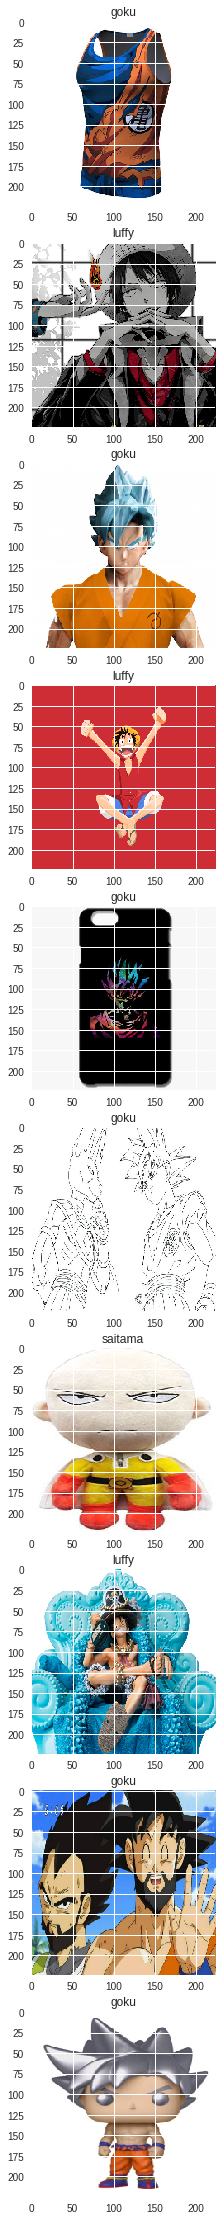

In [0]:
visualize_dataset(train_generator, 10, img_size=(40, 40))

In [0]:
def visualize_augmented_images(data_generator, num_images, 
                               num_augmented_images_per_image,
                               img_size=(20, 20)):
  filepaths = data_generator.filepaths
  
  rev_class_indices = {value: key for key, value in data_generator.class_indices.items()}
  labels = [rev_class_indices[label] for label in data_generator.labels]
  
  idx = np.random.choice(len(filepaths), size=num_images, replace=False)
  filepaths = [filepaths[i] for i in idx]
  labels = [labels[i] for i in idx]
    
  imgs = [ image.load_img(img_path, target_size=data_generator.target_size) \
          for img_path in filepaths ]
  
  fig = plt.figure(figsize=img_size)
  for i, img in enumerate(imgs):
    ax = fig.add_subplot(num_images*2, num_augmented_images_per_image, i*2*num_augmented_images_per_image+1)
    plt.imshow(img)
    ax.set_title(labels[i] + ' original')
    
    img = image.img_to_array(img)
    img = img.reshape((1, ) + img.shape)
    for j, batch in enumerate( data_generator.image_data_generator.flow(img, batch_size=1) ):
      if j == num_augmented_images_per_image:
        break
  
      ax = fig.add_subplot(num_images*2, num_augmented_images_per_image, (i*2 + 1)*num_augmented_images_per_image+j+1)
      ax.set_title(labels[i] + ' augmented ' + str(j))
      plt.imshow( image.array_to_img(batch[0]) )

  plt.show()

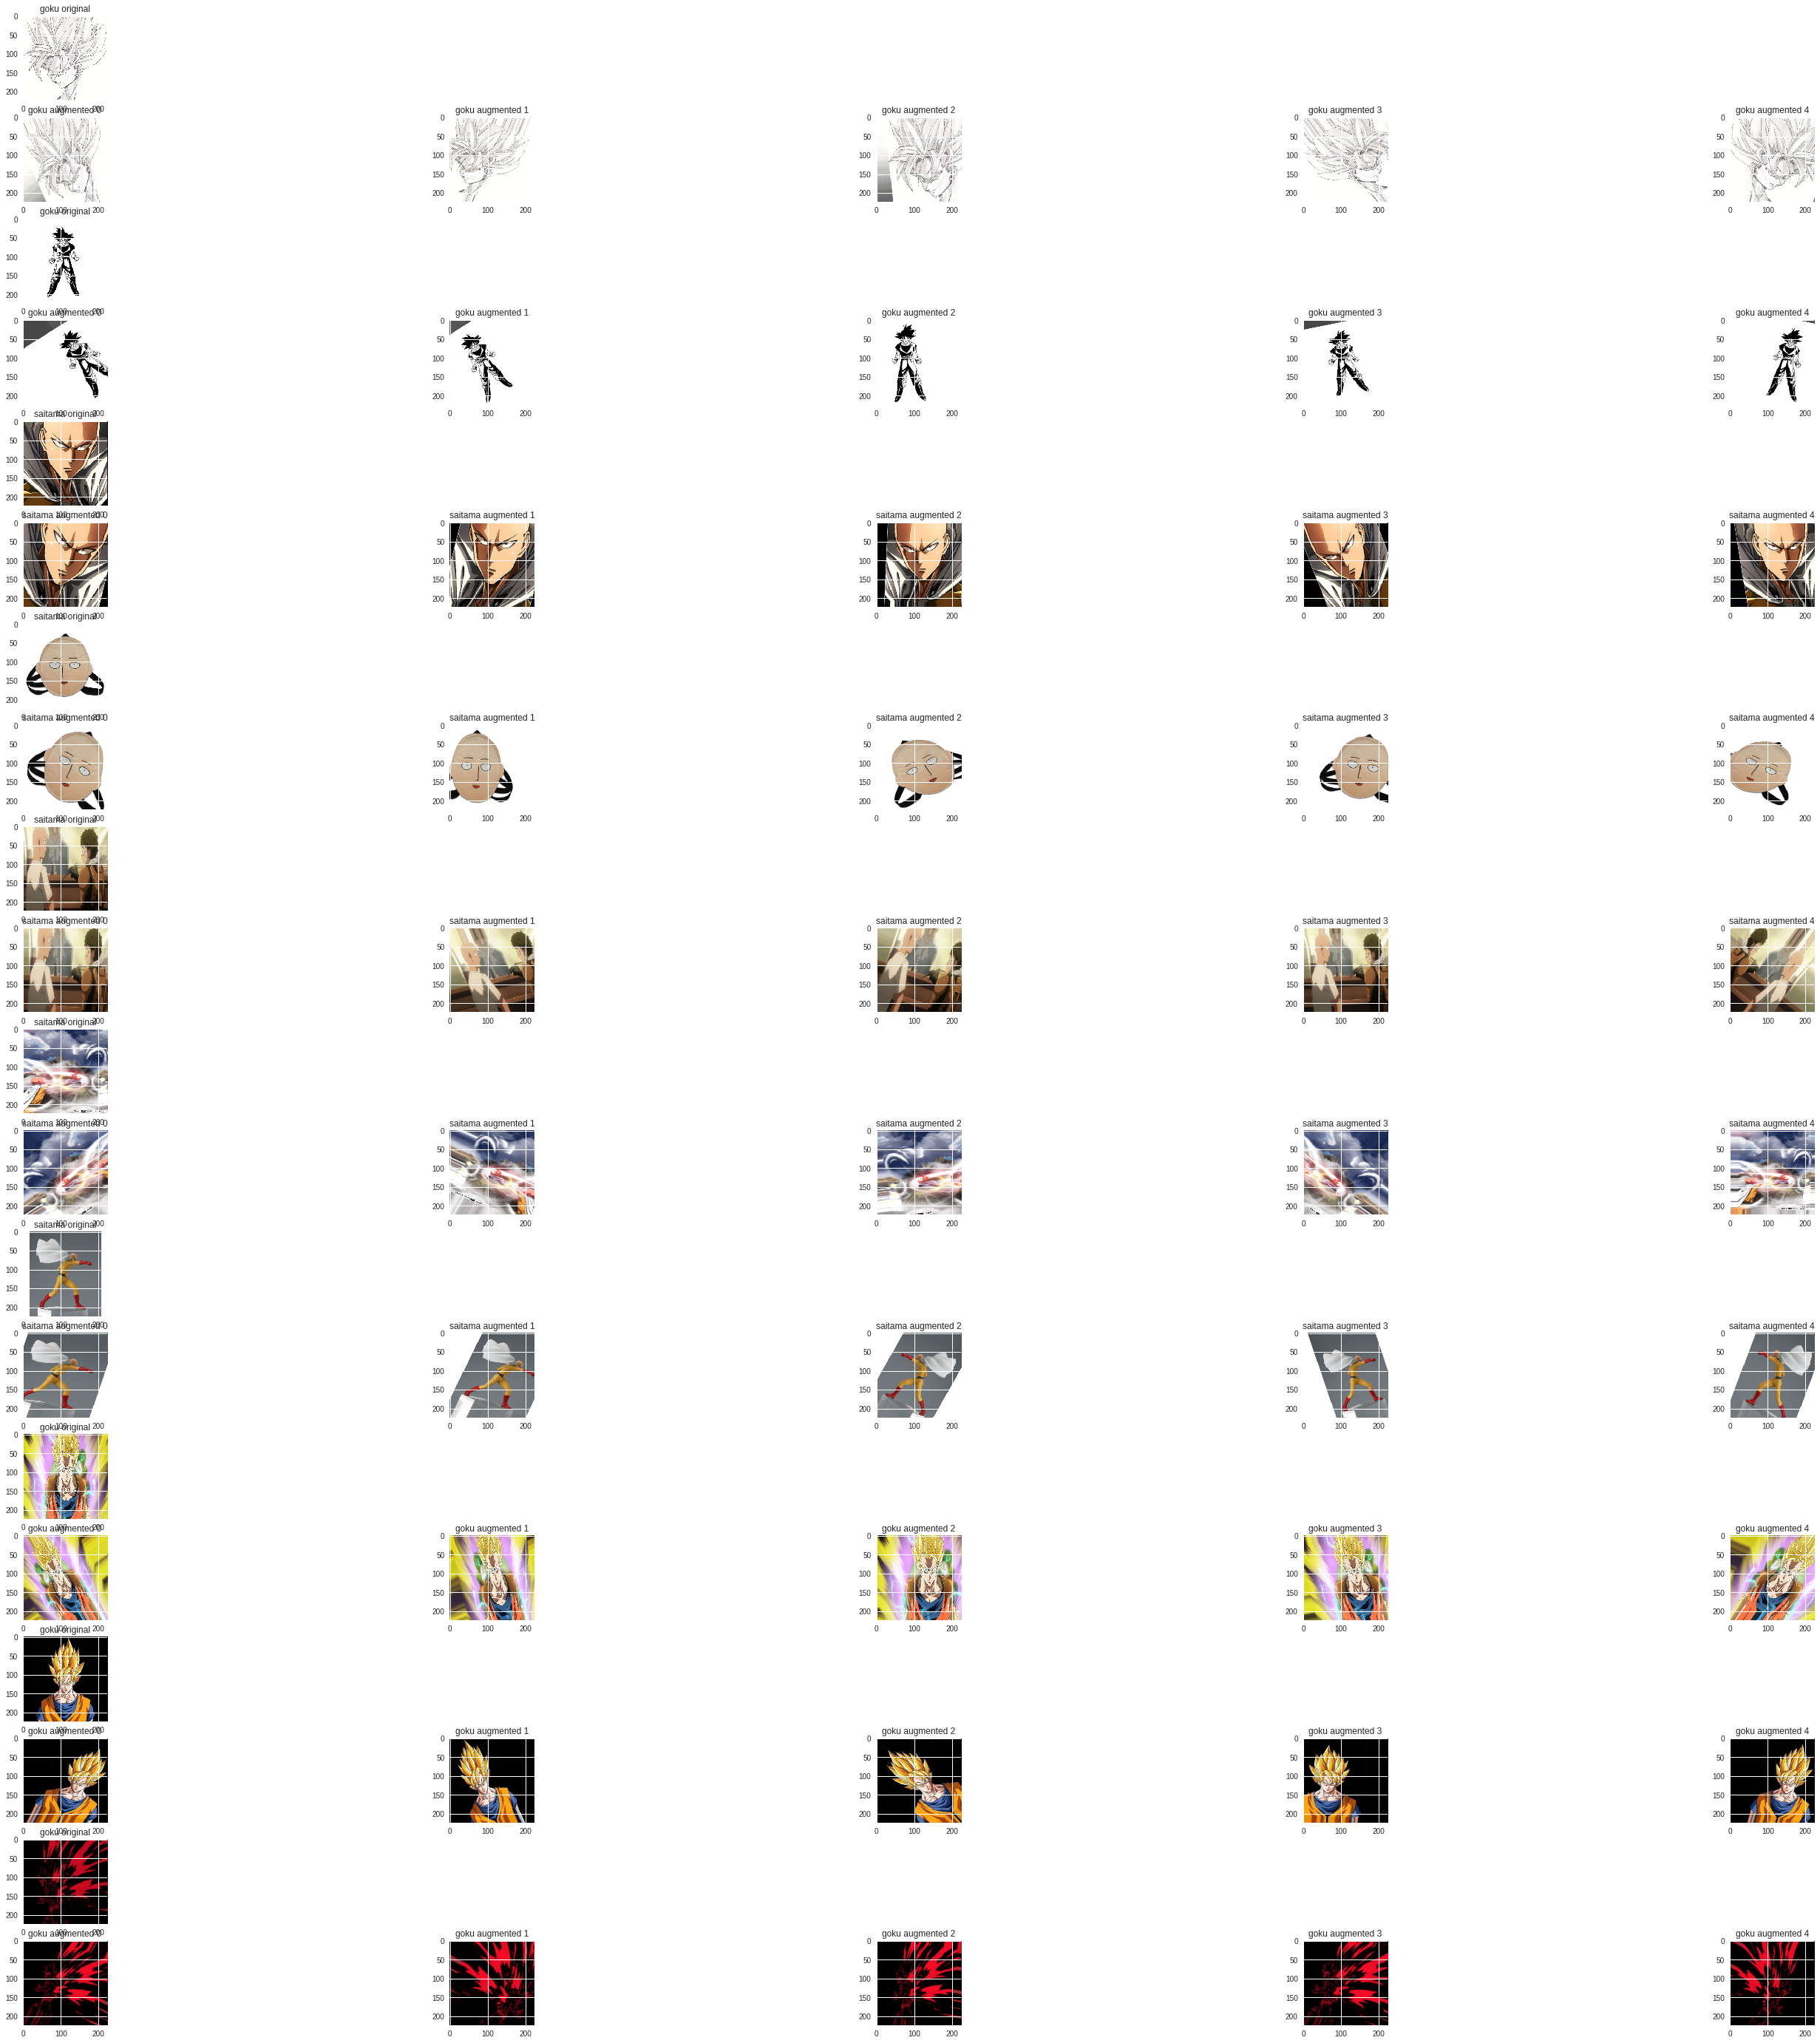

In [0]:
visualize_augmented_images(train_generator, 10, 5, img_size=(50, 50))

In [4]:
from keras import layers 
from keras import models

model = models.Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)) )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(256, activation='relu') )
model.add( layers.Dense(num_classes, activation='softmax') )

print(model.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


NameError: ignored

In [0]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer=optimizers.RMSprop(lr=1e-4)
)

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=10
)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


50/50 [==============================] - 39s 781ms/step - loss: 1.0879 - acc: 0.3665 - val_loss: 1.0651 - val_acc: 0.4156
Epoch 2/50
50/50 [==============================] - 38s 754ms/step - loss: 1.0492 - acc: 0.4192 - val_loss: 1.0381 - val_acc: 0.4375
Epoch 3/50
50/50 [==============================] - 37s 742ms/step - loss: 1.0162 - acc: 0.4809 - val_loss: 1.0596 - val_acc: 0.4031
Epoch 4/50
50/50 [==============================] - 38s 754ms/step - loss: 0.9913 - acc: 0.5094 - val_loss: 1.0715 - val_acc: 0.5094
Epoch 5/50
50/50 [==============================] - 37s 745ms/step - loss: 0.9554 - acc: 0.5403 - val_loss: 1.1862 - val_acc: 0.5125
Epoch 6/50
50/50 [==============================] - 37s 746ms/step - loss: 0.9621 - acc: 0.5410 - val_loss: 0.9809 - val_acc: 0.5469
Epoch 7/50
50/50 [==============================] - 37s 749ms/step - loss: 0.9365 - acc: 0.5672 - val_loss: 0.9824 - val_acc: 0.5531
Epoch 8/50
50/50 [==============================] - 38s 764ms/step - loss: 0.920

In [0]:
model.save('data-augmentation_end-to-end-cnn.h5')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
model.load_weights('data-augmentation_end-to-end-cnn.h5')

In [0]:
def plot_loss_accuracy(history):
  fig = plt.figure()
  
  x_axis = range( len(history.history['loss']) )
  
  ax = fig.add_subplot(121)
  ax.scatter(x_axis, history.history['loss'], label='Training Loss')
  ax.plot(x_axis, history.history['val_loss'], label='Validation Loss')
  ax.set_title('Loss Plot')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')
  
  ax = fig.add_subplot(122)
  ax.scatter(x_axis, history.history['acc'], label='Training Accuracy')
  ax.plot(x_axis, history.history['val_acc'], label='Validation Accuracy')
  ax.set_title('Accuracy Plot')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Accuracy')
  
  plt.show()
  plt.close(fig)

In [0]:
plot_loss_accuracy(history)

In [0]:
help(model.predict_classes)

Help on method predict_classes in module keras.engine.sequential:

predict_classes(x, batch_size=32, verbose=0) method of keras.engine.sequential.Sequential instance
    Generate class predictions for the input samples.
    
    The input samples are processed batch by batch.
    
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        batch_size: integer.
        verbose: verbosity mode, 0 or 1.
    
    # Returns:
        A numpy array of class predictions.



In [0]:
def visualize_model_on_test_data(model, data_generator, num_images, img_size=(20, 20)):
  filepaths = data_generator.filepaths
  
  rev_class_indices = {value: key for key, value in data_generator.class_indices.items()}
  labels = [rev_class_indices[label] for label in data_generator.labels]
  
  idx = np.random.choice(len(filepaths), size=num_images, replace=False)
  filepaths = [filepaths[i] for i in idx]
  labels = [labels[i] for i in idx]
    
  imgs = [ image.load_img(img_path, target_size=data_generator.target_size) \
          for img_path in filepaths ]
  
  imgs_array = [ image.img_to_array(img) for img in imgs ]
  imgs_array = [ img.reshape((1, ) + img.shape) for img in imgs_array ]
  preds = [ model.predict_classes(img)[0] for img in imgs_array ]
  probs = [ model.predict(img)[0][label] for img in imgs_array for img, label in zip(imgs_array, preds) ]
  
  rev_class_indices = {value: key for key, value in data_generator.class_indices.items()}
  preds = [ rev_class_indices[label] for label in preds ]
  
  for i, img in enumerate(imgs):
    plt.imshow(img)
    plt.title('Actual: ' + str(labels[i]) + ', Predicted: ' + str(preds[i]) + ', Probability: ' + str(probs[i]))
    plt.show()

In [0]:
visualize_model_on_test_data(model, test_generator, 100, img_size=(50, 50))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import shutil

# Because number of training images is very few for Saitama, that label is not predicted that often.
# Re shaping the training data

def move_data_to_raw_folder():
  for label in ['goku', 'luffy', 'saitama']:
    for dir_ in [train_dir, valid_dir, test_dir]:
      src_dir = os.path.join(dir_, label)
      for fname in os.listdir(src_dir):
        src_path = os.path.join(src_dir, fname)
        dest_path = os.path.join('raw', label, fname)
        shutil.move(src_path, dest_path)

In [0]:
move_data_to_raw_folder()

In [0]:
for label in ('goku', 'luffy', 'saitama'):
  dir_ = os.path.join('raw', label)
  print( len(os.listdir(dir_)), 'images in', label )

520 images in goku
582 images in luffy
401 images in saitama


In [0]:
# This time we will use 300 images of each for training

def move_data_to_train_valid_test_folders(num_train_files, num_valid_files):
  
  for label in os.listdir(raw_data_dir):
    label_dir = os.path.join(raw_data_dir, label)
    fnames = os.listdir(label_dir)
    random.shuffle(fnames)
  
    num_files = len(fnames)
    num_test_files = num_files - num_train_files - num_valid_files
  
    test_fnames = fnames[:num_test_files]
    valid_fnames = fnames[num_test_files: num_test_files + num_valid_files]
    train_fnames = fnames[num_test_files + num_valid_files: ]

    for fname in test_fnames:
      src_path = os.path.join(label_dir, fname)
      dest_path = os.path.join(test_dir, label, fname)
      shutil.move(src_path, dest_path)

    for fname in valid_fnames:
      src_path = os.path.join(label_dir, fname)
      dest_path = os.path.join(valid_dir, label, fname)
      shutil.move(src_path, dest_path)

    for fname in train_fnames:
      src_path = os.path.join(label_dir, fname)
      dest_path = os.path.join(train_dir, label, fname)
      shutil.move(src_path, dest_path)

In [0]:
num_train_files = 300
num_valid_files = 75

move_data_to_train_valid_test_folders(num_train_files, num_valid_files)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

Found 846 images belonging to 3 classes.
Found 213 images belonging to 3 classes.
Found 351 images belonging to 3 classes.


In [0]:
model = models.Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)) )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(256, activation='relu') )
model.add( layers.Dense(num_classes, activation='softmax') )

print(model.summary())

In [0]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer=optimizers.RMSprop(lr=1e-4)
)

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

models_dir = 'models'
if not os.path.exists(models_dir):
  os.mkdir(models_dir)

model_filename = 'model4.h5'
model_filepath = os.path.join(models_dir, model_filename)

callbacks = [ EarlyStopping(monitor='val_acc', patience=5),
              ModelCheckpoint(filepath=model_filepath, monitor='val_loss', save_best_only=True) ]

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=10,
    callbacks=callbacks
)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


50/50 [==============================] - 37s 744ms/step - loss: 1.0973 - acc: 0.3759 - val_loss: 1.0698 - val_acc: 0.4466
Epoch 2/100
50/50 [==============================] - 36s 716ms/step - loss: 1.0590 - acc: 0.4543 - val_loss: 1.0817 - val_acc: 0.3916
Epoch 3/100
50/50 [==============================] - 36s 721ms/step - loss: 1.0287 - acc: 0.4834 - val_loss: 1.0000 - val_acc: 0.5268
Epoch 4/100
50/50 [==============================] - 37s 731ms/step - loss: 1.0117 - acc: 0.4840 - val_loss: 0.9829 - val_acc: 0.5566
Epoch 5/100
50/50 [==============================] - 36s 720ms/step - loss: 0.9662 - acc: 0.5369 - val_loss: 1.1280 - val_acc: 0.4195
Epoch 6/100
50/50 [==============================] - 36s 728ms/step - loss: 0.9655 - acc: 0.5474 - val_loss: 0.9198 - val_acc: 0.5437
Epoch 7/100
50/50 [==============================] - 37s 734ms/step - loss: 0.9306 - acc: 0.5636 - val_loss: 0.8900 - val_acc: 0.5705
Epoch 8/100
50/50 [==============================] - 36s 729ms/step - loss

In [0]:
model.save(model_filepath)

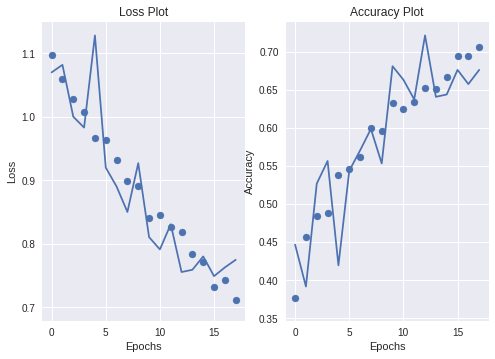

In [0]:
plot_loss_accuracy(history)

In [0]:
model.load_weights(model_filepath)

In [0]:
visualize_model_on_test_data(model, test_generator, 50, img_size=(50, 50))

Output hidden; open in https://colab.research.google.com to view.

In [7]:
model = models.Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)) )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(128, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(256, activation='relu') )
model.add( layers.Dense(num_classes, activation='softmax') )

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       147584    
__________

In [0]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer=optimizers.RMSprop(lr=1e-4)
)

In [0]:
# I got a feeling that the training could have continued for some time, 
# so increasing the patience

models_dir = 'models'
model_filename = 'model5.h5'
model_filepath = os.path.join(models_dir, model_filename)

callbacks = [ EarlyStopping(monitor='val_acc', patience=10),
              ModelCheckpoint(filepath=model_filepath, monitor='val_loss', save_best_only=True) ]

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=10,
    callbacks=callbacks
)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


50/50 [==============================] - 37s 745ms/step - loss: 1.0923 - acc: 0.3746 - val_loss: 1.0560 - val_acc: 0.4887
Epoch 2/100
50/50 [==============================] - 36s 718ms/step - loss: 1.0641 - acc: 0.4397 - val_loss: 1.0262 - val_acc: 0.4430
Epoch 3/100
50/50 [==============================] - 36s 724ms/step - loss: 1.0273 - acc: 0.4703 - val_loss: 0.9663 - val_acc: 0.5113
Epoch 4/100
50/50 [==============================] - 36s 723ms/step - loss: 0.9922 - acc: 0.5200 - val_loss: 0.9592 - val_acc: 0.5503
Epoch 5/100
50/50 [==============================] - 36s 721ms/step - loss: 0.9652 - acc: 0.5394 - val_loss: 0.9380 - val_acc: 0.5469
Epoch 6/100
50/50 [==============================] - 36s 726ms/step - loss: 0.9310 - acc: 0.5755 - val_loss: 0.9755 - val_acc: 0.5696
Epoch 7/100
50/50 [==============================] - 36s 717ms/step - loss: 0.9186 - acc: 0.5724 - val_loss: 0.8683 - val_acc: 0.6242
Epoch 8/100
50/50 [==============================] - 36s 720ms/step - loss

In [0]:
model.load_weights(model_filepath)

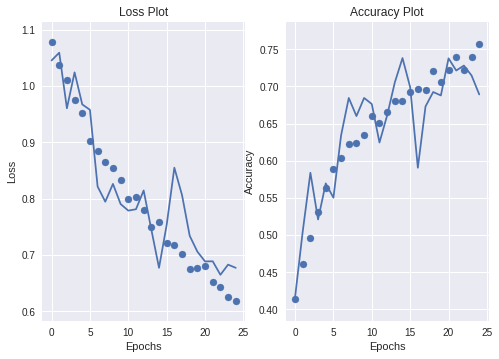

In [0]:
plot_loss_accuracy(history)

In [0]:
visualize_model_on_test_data(model, test_generator, 50, img_size=(50, 50))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
model.summary()

In [0]:
from keras import backend as K

def show_heatmap_image(image, model):
  
  x = image.img_to_array(image)
  x = np.expand_dims(x, axis=0)
  
  preds = model.predict(x)
  selected_label = np.argmax(preds[0])
  image_output = model.output[:, selected_label]
  
  last_conv_layer = get_last_conv_layer(model)
  grads = K.gradients(image_output, last_conv_layer.output)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
  iterate = K.function([model.input],
                       [pooled_grads, last_conv_layer.output[0]])
  
  pooled_grads_value, conv_layer_output_value = iterate([x])
  print(conv_layer_output_value.shape)

In [0]:
def get_last_conv_layer(model):
  selected_layer = None
  for layer in model.layers:
    if layer.name.startswith('conv2d'):
      selected_layer = layer
  return selected_layer

In [0]:
import random
from keras.preprocessing import image

print( type(random.choice( test_generator.filepaths )) )

img = image.load_img( random.choice(test_generator.filepaths) )
show_heatmap_image(img, model)